# Analisis Mining Data pada Skytrax Airline Reviews Dataset

Oleh : 

        Nadya Yuniar Desdi Prameswari | 06211740000077
        Muhammad Zamroni Al Fikri     | 06211740000084
        DATA MINING - B (EAS)

## Import Package 

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from sklearn import metrics, model_selection, preprocessing, naive_bayes
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, StratifiedKFold, cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, auc, roc_curve, f1_score, classification_report
from sklearn.feature_selection import RFE, RFECV, SelectFromModel, VarianceThreshold

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import random
%matplotlib inline

from scipy import interp

## Input data 

In [2]:
data = pd.read_excel('F:/S1-ITS/SEMESTER 6/DATMIN/EAS/data.xlsx')
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 17 columns):
airline            65947 non-null object
overall            64017 non-null float64
author             65947 non-null object
review_date        65947 non-null object
customer_review    65947 non-null object
aircraft           19718 non-null object
traveller_type     39755 non-null object
cabin              63303 non-null object
route              39726 non-null object
date_flown         39633 non-null object
seat_comfort       60681 non-null float64
cabin_service      60715 non-null float64
food_bev           52608 non-null float64
entertainment      44193 non-null float64
ground_service     39358 non-null float64
value_for_money    63975 non-null float64
recommended        64440 non-null object
dtypes: float64(7), object(10)
memory usage: 8.6+ MB


In [4]:
data.isnull().sum()

airline                0
overall             1930
author                 0
review_date            0
customer_review        0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

## Preprocessing 

In [5]:
df_drop1 = data.drop(['overall','author','review_date','customer_review','aircraft','traveller_type','cabin',
                      'route','date_flown'], axis=1)
df_drop1

,airline,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...
65942,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,no
65943,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,no
65944,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,no
65945,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
imp_mode = pd.DataFrame(imputer.fit_transform(df_drop1))
imp_mode

,0,1,2,3,4,5,6,7
0,Turkish Airlines,4,5,4,4,2,4,yes
1,Turkish Airlines,4,1,1,1,1,1,no
2,Turkish Airlines,1,4,1,3,1,2,no
3,Turkish Airlines,4,5,5,5,5,5,yes
4,Turkish Airlines,1,1,1,1,1,1,no
...,...,...,...,...,...,...,...,...
65942,Ukraine International,1,5,1,1,1,1,no
65943,Ukraine International,1,5,1,1,1,1,no
65944,Ukraine International,1,5,1,1,1,1,no
65945,Ukraine International,1,5,1,1,1,1,no


In [7]:
new1 = {'airline' : imp_mode[0], 'seat_comfort' : imp_mode[1], 'cabin_service' : imp_mode[2], 'food_bev' : imp_mode[3], 'entertainment' : imp_mode[4], 'ground_service' : imp_mode[5], 'value_for_money' : imp_mode[6], 'recommended' : imp_mode[7]}
df = pd.DataFrame(data=new1)
df

,airline,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,4,5,4,4,2,4,yes
1,Turkish Airlines,4,1,1,1,1,1,no
2,Turkish Airlines,1,4,1,3,1,2,no
3,Turkish Airlines,4,5,5,5,5,5,yes
4,Turkish Airlines,1,1,1,1,1,1,no
...,...,...,...,...,...,...,...,...
65942,Ukraine International,1,5,1,1,1,1,no
65943,Ukraine International,1,5,1,1,1,1,no
65944,Ukraine International,1,5,1,1,1,1,no
65945,Ukraine International,1,5,1,1,1,1,no


In [8]:
df.isnull().sum()

airline            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [9]:
rec_dum = pd.get_dummies(df.recommended, drop_first=True)
rec_dum

,yes
0,1
1,0
2,0
3,1
4,0
...,...
65942,0
65943,0
65944,0
65945,0


In [10]:
rec_dum.yes

0        1
1        0
2        0
3        1
4        0
        ..
65942    0
65943    0
65944    0
65945    0
65946    0
Name: yes, Length: 65947, dtype: uint8

In [11]:
df_drop = df.drop(['recommended'], axis=1)
df_drop

,airline,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,4,5,4,4,2,4
1,Turkish Airlines,4,1,1,1,1,1
2,Turkish Airlines,1,4,1,3,1,2
3,Turkish Airlines,4,5,5,5,5,5
4,Turkish Airlines,1,1,1,1,1,1
...,...,...,...,...,...,...,...
65942,Ukraine International,1,5,1,1,1,1
65943,Ukraine International,1,5,1,1,1,1
65944,Ukraine International,1,5,1,1,1,1
65945,Ukraine International,1,5,1,1,1,1


In [79]:
new = {'airline' : df_drop.airline, 'seat_comfort' : df_drop.seat_comfort, 'cabin_service' : df_drop.cabin_service,
       'food_bev' : df_drop.food_bev, 'entertainment' : df_drop.entertainment, 'ground_service' : df_drop.ground_service,
       'value_for_money' : df_drop.value_for_money, 'recommended' : rec_dum.yes}
new_df = pd.DataFrame(data=new)
new_df

,airline,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,4,5,4,4,2,4,1
1,Turkish Airlines,4,1,1,1,1,1,0
2,Turkish Airlines,1,4,1,3,1,2,0
3,Turkish Airlines,4,5,5,5,5,5,1
4,Turkish Airlines,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
65942,Ukraine International,1,5,1,1,1,1,0
65943,Ukraine International,1,5,1,1,1,1,0
65944,Ukraine International,1,5,1,1,1,1,0
65945,Ukraine International,1,5,1,1,1,1,0


In [83]:
df.describe()

,airline,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,65947.0,65947.0,65947.0,65947.0,65947.0,65947.0,65947
unique,81,5.0,5.0,5.0,5.0,5.0,5.0,2
top,Spirit Airlines,1.0,5.0,1.0,1.0,1.0,1.0,no
freq,2934,20488.0,23658.0,27779.0,35186.0,42329.0,21834.0,35401


## Eksplorasi Data

### 1. Pie Chart 'seat_comfort'

In [13]:
pie_1 = pd.DataFrame(new_df['seat_comfort'].value_counts())
pie_1

,seat_comfort
1.0,20488
4.0,14433
3.0,12139
5.0,10665
2.0,8222


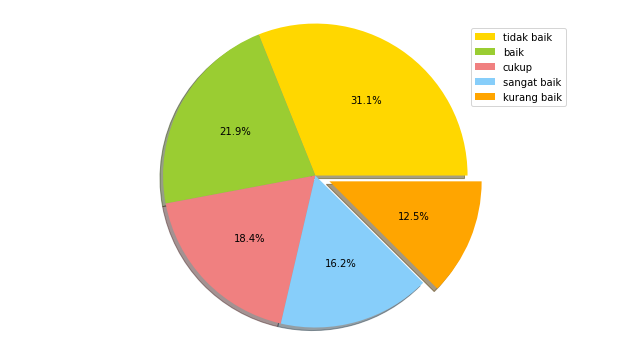

In [14]:
labels = ['tidak baik', 'baik', 'cukup', 'sangat baik', 'kurang baik']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode =(0,0,0,0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,5)) 
ax1.pie(pie_1.seat_comfort, explode=explode, colors=colors, autopct='%1.1f%%', shadow = True)
ax1.legend(labels, loc = "best", bbox_to_anchor=(0.7, 0.75, 0.2, 0.2))
plt.axis('equal')
plt.tight_layout()
plt.savefig('F:/eas/seat_comfort.png')
plt.show()

### 2. Pie Chart 'cabin_service'

In [15]:
pie_2 = pd.DataFrame(new_df['cabin_service'].value_counts())
pie_2

,cabin_service
5.0,23658
1.0,14660
4.0,11428
3.0,8887
2.0,7314


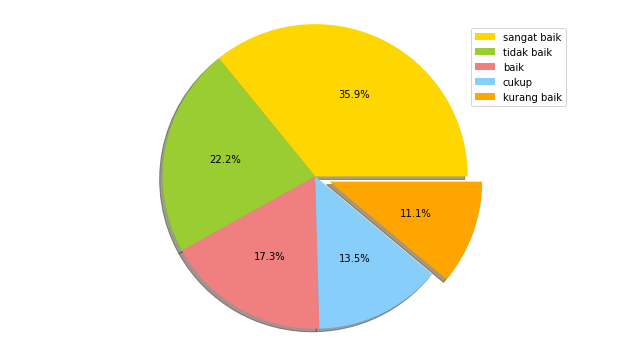

In [16]:
labels = ['sangat baik', 'tidak baik', 'baik', 'cukup', 'kurang baik']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode =(0,0,0,0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,5)) 
ax1.pie(pie_2.cabin_service, explode=explode, colors=colors, autopct='%1.1f%%', shadow = True)
ax1.legend(labels, loc = "best", bbox_to_anchor=(0.7, 0.75, 0.2, 0.2))
plt.axis('equal')
plt.tight_layout()
plt.savefig('F:/eas/cabin_service.png')
plt.show()

### 3. Pie Chart 'food_bev'

In [17]:
pie_3 = pd.DataFrame(new_df['food_bev'].value_counts())
pie_3

,food_bev
1.0,27779
4.0,11264
5.0,9955
3.0,9824
2.0,7125


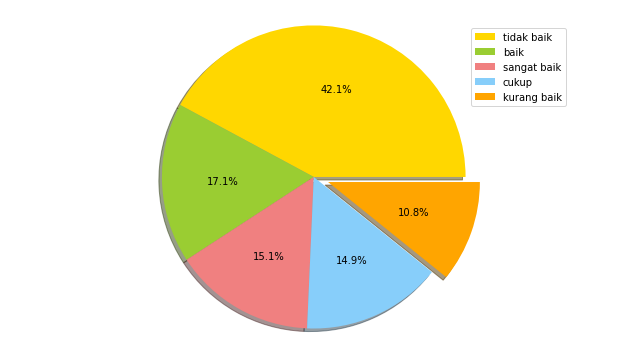

In [18]:
labels = ['tidak baik', 'baik', 'sangat baik', 'cukup', 'kurang baik']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode =(0,0,0,0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,5)) 
ax1.pie(pie_3.food_bev, explode=explode, colors=colors, autopct='%1.1f%%', shadow = True)
ax1.legend(labels, loc = "best", bbox_to_anchor=(0.7, 0.75, 0.2, 0.2))
plt.axis('equal')
plt.tight_layout()
plt.savefig('F:/eas/food_bev.png')
plt.show()

### 4. Pie Chart 'entertainment'

In [19]:
pie_4 = pd.DataFrame(new_df['entertainment'].value_counts())
pie_4

,entertainment
1.0,35186
4.0,9410
5.0,8250
3.0,8017
2.0,5084


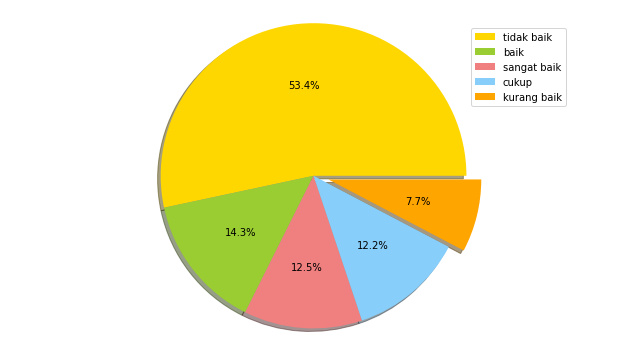

In [20]:
labels = ['tidak baik', 'baik', 'sangat baik', 'cukup', 'kurang baik']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode =(0,0,0,0,0.1)
fig, ax1 = plt.subplots(figsize = (9,5))
ax1.pie(pie_4.entertainment, explode=explode, colors=colors, autopct='%1.1f%%', shadow = True)
ax1.legend(labels, loc = "best", bbox_to_anchor=(0.7, 0.75, 0.2, 0.2))
plt.axis('equal')
plt.tight_layout()
plt.savefig('F:/eas/entertainment.png')
plt.show()

### 5. Pie Chart 'ground_service'

In [21]:
pie_5 = pd.DataFrame(new_df['ground_service'].value_counts())
pie_5

,ground_service
1.0,42329
5.0,8135
4.0,6816
3.0,4971
2.0,3696


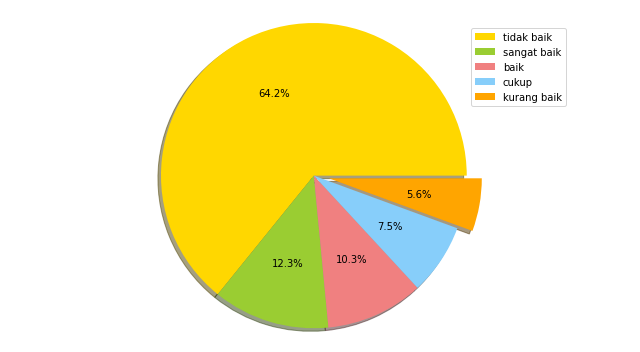

In [22]:
labels = ['tidak baik', 'sangat baik', 'baik', 'cukup', 'kurang baik']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode =(0,0,0,0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,5)) 
ax1.pie(pie_5.ground_service, explode=explode, colors=colors, autopct='%1.1f%%', shadow = True)
ax1.legend(labels, loc = "best", bbox_to_anchor=(0.7, 0.75, 0.2, 0.2))
plt.axis('equal')
plt.tight_layout()
plt.savefig('F:/eas/ground_service.png')
plt.show()

### 6. Pie Chart 'value_for_money'

In [23]:
pie_6 = pd.DataFrame(new_df['value_for_money'].value_counts())
pie_6

,value_for_money
1.0,21834
5.0,15369
4.0,12938
3.0,8269
2.0,7537


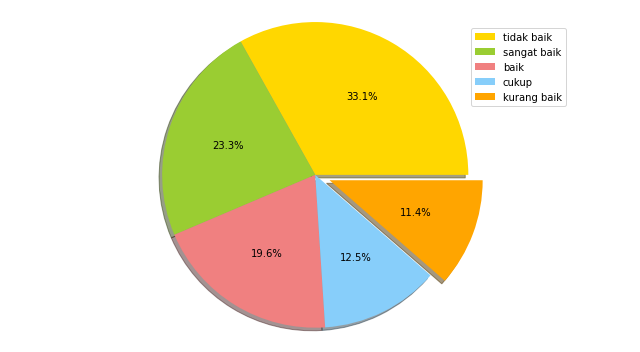

In [24]:
labels = ['tidak baik', 'sangat baik', 'baik', 'cukup', 'kurang baik']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode =(0,0,0,0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,5)) 
ax1.pie(pie_6.value_for_money, explode=explode, colors=colors, autopct='%1.1f%%', shadow = True)
ax1.legend(labels, loc = "best", bbox_to_anchor=(0.7, 0.75, 0.2, 0.2))
plt.axis('equal')
plt.tight_layout()
plt.savefig('F:/eas/value_for_money.png')
plt.show()

### 7. Pie Chart 'recommended'

In [25]:
pie_7 = pd.DataFrame(new_df['recommended'].value_counts())
pie_7

,recommended
0,35401
1,30546


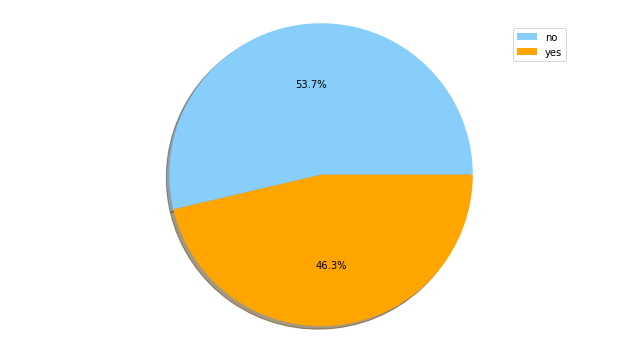

In [86]:
labels = ['no','yes']
colors = ['lightskyblue', 'orange']
fig, ax1 = plt.subplots(figsize = (9,5)) 
ax1.pie(pie_7.recommended, colors=colors, autopct='%1.1f%%', shadow = True)
ax1.legend(labels, loc = "best", bbox_to_anchor=(0.7, 0.75, 0.2, 0.2))
plt.axis('equal')
plt.tight_layout()
plt.savefig('F:/eas/recommendation.png')
plt.show()

## Feature Selection

In [27]:
Y = new_df['recommended']
X = new_df.drop(['recommended','airline'], axis=1)
Kfold=StratifiedKFold(5)

In [28]:
# feature extraction
model = ExtraTreesClassifier(random_state=99)
model.fit(X, Y)
print(model.feature_importances_)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.22762606 0.14384381 0.22653227 0.0204227  0.04136824 0.34020692]


In [29]:
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num Features: 6
Selected Features: [ True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1]


In [30]:
feature_summary_rfm = pd.DataFrame({'feature_list': X.columns, 'feature_ranking': fit.ranking_, 'selected_features': fit.support_})

In [31]:
feature_summary_rfm = feature_summary_rfm.sort_values('feature_ranking')
feature_summary_rfm

,feature_list,feature_ranking,selected_features
0,seat_comfort,1,True
1,cabin_service,1,True
2,food_bev,1,True
3,entertainment,1,True
4,ground_service,1,True
5,value_for_money,1,True


## Feature Extraction with PCA

In [32]:
#set up feature
feature = new_df.iloc[0:65946,1:8]
feature

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,4,5,4,4,2,4,1
1,4,1,1,1,1,1,0
2,1,4,1,3,1,2,0
3,4,5,5,5,5,5,1
4,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...
65941,1,5,1,1,1,1,0
65942,1,5,1,1,1,1,0
65943,1,5,1,1,1,1,0
65944,1,5,1,1,1,1,0


[ 62.68  73.5   83.18  89.31  93.88  97.85 100.  ]


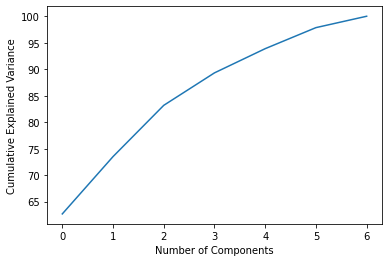

In [67]:
#convert it numpy array
x=feature.values

#scallling the values
x=scale(x)
pca=PCA(n_components=7)
pca.fit(x)

#the amount of variance PC
var=pca.explained_variance_ratio_

#the amount of variance PC
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

print (var1)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(var1)
plt.savefig('F:/eas/kurva pca.png')

In [34]:
#pca components
pca.components_

array([[ 0.40630358,  0.35155513,  0.40293261,  0.33227876,  0.28021426,
         0.42876456,  0.41976595],
       [-0.11022223,  0.17400011, -0.26881097, -0.58098268,  0.72699943,
         0.07569564,  0.11626182],
       [ 0.12923305, -0.58747234,  0.07577423,  0.42845665,  0.59087604,
        -0.16906358, -0.26672318],
       [-0.43326318,  0.63790093,  0.05380522,  0.40673508,  0.20591807,
        -0.35047398, -0.26796034],
       [ 0.34806179,  0.12121601,  0.64422409, -0.4377696 ,  0.00876325,
        -0.30186516, -0.40779087],
       [-0.69269812, -0.27795983,  0.58453615, -0.10675242,  0.03588073,
         0.13434536,  0.26550509],
       [ 0.13180517, -0.04622367,  0.00648445,  0.00176763,  0.00713023,
        -0.74151559,  0.65616262]])

In [85]:
#tabel nilai PCA
colnames = list(feature.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],
                       'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,seat_comfort,0.406304,-0.110222,0.129233,-0.433263,0.348062
1,cabin_service,0.351555,0.174000,-0.587472,0.637901,0.121216
2,food_bev,0.402933,-0.268811,0.075774,0.053805,0.644224
3,entertainment,0.332279,-0.580983,0.428457,0.406735,-0.437770
4,ground_service,0.280214,0.726999,0.590876,0.205918,0.008763
5,value_for_money,0.428765,0.075696,-0.169064,-0.350474,-0.301865
6,recommended,0.419766,0.116262,-0.266723,-0.267960,-0.407791


## Klasifikasi & Model Selection

Keterangan : Pembagian data yang dilakukan adalah 70% data training dan 30% data testing

### Holdout Non Stratified 

In [36]:
Y = new_df['recommended']
X = new_df.drop(['recommended','airline'], axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=123)

#### 1. Gaussian Naive Bayes

In [37]:
gnb = GaussianNB()
y_pred = gnb.fit(Xtrain, Ytrain).predict(Xtest)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [38]:
conf_matrix=confusion_matrix(Ytest, y_pred)
print(conf_matrix)

[[9827  755]
 [ 894 8309]]


In [39]:
akurasi=accuracy_score(Ytest, y_pred)
presisi=precision_score(Ytest, y_pred, pos_label=0, average=None)
recalls=recall_score(Ytest,y_pred, pos_label=0, average=None)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [40]:
print(akurasi)
print(presisi)
print(recalls)

0.9166540308314379
[0.91661226 0.91670344]
[0.92865243 0.90285776]


In [41]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9166540308314379
0.9166578492541262
0.9157550962125558


#### 2. Random Forest 

In [42]:
RandomForest = RandomForestClassifier(random_state=0)
RandomForest = RandomForest.fit(Xtrain,Ytrain)
RandomForest_Prediction = RandomForest.predict(Xtest)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
CMRandom = confusion_matrix(Ytest, RandomForest_Prediction)
print('Confusion Matrix : \n', CMRandom)

Confusion Matrix : 
 [[9872  710]
 [ 669 8534]]


In [44]:
akurasiRF=accuracy_score(Ytest, RandomForest_Prediction)
f1RF=f1_score(Ytest,RandomForest_Prediction)
presisi = precision_score (Ytest,RandomForest_Prediction)

fpr, tpr, thresholds = roc_curve(Ytest, RandomForest_Prediction)
aucRF = auc(fpr, tpr)
print ('Akurasi Random Forest : ', akurasiRF)
print ('f1 Random Forest : ', f1RF)
print ('AUC Random Forest : ', aucRF)
print ('Presisi Random Forest : ', presisi)

Akurasi Random Forest :  0.9303007328784433
f1 Random Forest :  0.9252452973383205
AUC Random Forest :  0.9301056230318427
Presisi Random Forest :  0.9231934227607097


#### 3. Logistic Regression

In [45]:
Regresi=LogisticRegression(C=1.0, class_weight=None, random_state=0)
Regresi.fit(Xtrain, Ytrain)
Regresi_Prediction=Regresi.predict(Xtest)
CMRegresi = confusion_matrix(Ytest, Regresi_Prediction)
CMRegresi1=DataFrame.from_records(CMRegresi)
print('Confusion Matrix : \n',CMRegresi)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix : 
 [[9905  677]
 [ 572 8631]]


In [46]:
akurasiRegresi=accuracy_score(Ytest, Regresi_Prediction)
f1Regresi=f1_score(Ytest,Regresi_Prediction)
presisi = precision_score (Ytest, Regresi_Prediction)
fpr, tpr, thresholds = roc_curve(Ytest, Regresi_Prediction)
aucRegresi = auc(fpr, tpr)
print ('Akurasi Logistic Regression : ', akurasiRegresi)
print ('f1 Logistic Regression : ', f1Regresi)
print ('AUC Logistic Regression : ', aucRegresi)
print ('Presisi : ', presisi)

Akurasi Logistic Regression :  0.9368713671973717
f1 Logistic Regression :  0.9325266058019556
AUC Logistic Regression :  0.936934895236536
Presisi :  0.9272668672110013


### Holdout Stratified

In [47]:
Y = new_df['recommended']
X = new_df.drop(['recommended','airline'], axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=123, stratify=Y)

#### 1. Gaussian Naive Bayes

In [48]:
gnb = GaussianNB()
y_pred = gnb.fit(Xtrain, Ytrain).predict(Xtest)

In [49]:
conf_matrix=confusion_matrix(Ytest, y_pred)
print(conf_matrix)

[[9927  694]
 [ 956 8208]]


In [50]:
akurasi=accuracy_score(Ytest, y_pred)
presisi=precision_score(Ytest, y_pred, pos_label=0, average=None)
recalls=recall_score(Ytest,y_pred, pos_label=0, average=None)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [51]:
print(akurasi)
print(presisi)
print(recalls)

0.9166034874905231
[0.91215657 0.92203999]
[0.93465775 0.89567874]


In [52]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9166034874905231
0.9170982827436027
0.9151682482071151


#### 2. Random Forest 

In [53]:
RandomForest = RandomForestClassifier(random_state=0)
RandomForest = RandomForest.fit(Xtrain,Ytrain)
RandomForest_Prediction = RandomForest.predict(Xtest)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
CMRandom = confusion_matrix(Ytest, RandomForest_Prediction)
print('Confusion Matrix : \n', CMRandom)

Confusion Matrix : 
 [[9968  653]
 [ 664 8500]]


In [55]:
akurasiRF=accuracy_score(Ytest, RandomForest_Prediction)
f1RF=f1_score(Ytest,RandomForest_Prediction)
presisi = precision_score (Ytest, RandomForest_Prediction)
fpr, tpr, thresholds = roc_curve(Ytest, RandomForest_Prediction)
aucRF = auc(fpr, tpr)
print ('Akurasi Random Forest : ', akurasiRF)
print ('f1 Random Forest : ', f1RF)
print ('AUC Random Forest : ', aucRF)
print ('Presisi Random Forest : ', presisi)

Akurasi Random Forest :  0.933434420015163
f1 Random Forest :  0.9280995796254845
AUC Random Forest :  0.9330302940761512
Presisi Random Forest :  0.9286572708401617


#### 3. Logistic Regression 

In [56]:
Regresi=LogisticRegression(C=1.0, class_weight=None, random_state=0)
Regresi.fit(Xtrain, Ytrain)
Regresi_Prediction=Regresi.predict(Xtest)
CMRegresi = confusion_matrix(Ytest, Regresi_Prediction)
CMRegresi1=DataFrame.from_records(CMRegresi)
print('Confusion Matrix : \n',CMRegresi)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix : 
 [[9993  628]
 [ 574 8590]]


In [57]:
akurasiRegresi=accuracy_score(Ytest, Regresi_Prediction)
f1Regresi=f1_score(Ytest,Regresi_Prediction)
presisi = precision_score (Ytest, Regresi_Prediction)

fpr, tpr, thresholds = roc_curve(Ytest, Regresi_Prediction)
aucRegresi = auc(fpr, tpr)
print ('Akurasi Logistic Regression : ', akurasiRegresi)
print ('f1 Logistic Regression : ', f1Regresi)
print ('AUC Logistic Regression : ', aucRegresi)
print ('Presisi Logistic Regression : ', presisi)

Akurasi Logistic Regression :  0.9392469042203689
f1 Logistic Regression :  0.9346099445109345
AUC Logistic Regression :  0.9391177271615974
Presisi Logistic Regression :  0.9318724235192015


### K-Fold Cross Validation 

In [58]:
Kfold = StratifiedKFold(n_splits=5)
kfold = KFold(n_splits=5)
rkfold = RepeatedKFold(n_splits=5,n_repeats=5)

In [59]:
Y = new_df['recommended']
X = new_df.drop(['recommended','airline'], axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=123)

#### 1. Gaussian Naive Bayes 

In [60]:
model_kfold = GaussianNB()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
results_kfold

array([0.91379833, 0.9115997 , 0.90620972, 0.92433088, 0.91629388])

In [61]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 91.44%


In [62]:
results_rkfold = model_selection.cross_val_score(GaussianNB(), X, Y, cv=rkfold)
results_rkfold

array([0.91910538, 0.91220622, 0.91409508, 0.9163697 , 0.91591478,
       0.92115239, 0.91546626, 0.91477747, 0.90939419, 0.91727955,
       0.91425322, 0.91622441, 0.91629388, 0.91492911, 0.91606642,
       0.91152388, 0.91736164, 0.91735537, 0.91561149, 0.91576314,
       0.91660349, 0.91705838, 0.91060732, 0.91644552, 0.91735537])

#### 2. Random Forest 

In [63]:
RandomForest_CV = RandomForestClassifier(random_state=55, bootstrap=False, max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators=100).fit(Xtrain, Ytrain)
AkurasiRF_CVScore = cross_val_score(RandomForest_CV, X, Y, cv=Kfold, scoring='accuracy')
F1RF_CVScore = cross_val_score(RandomForest_CV, X, Y, cv=Kfold, scoring='f1')
presisi_sc = cross_val_score(RandomForest_CV, X, Y, cv=Kfold, scoring='precision')
AkurasiRandomCV = AkurasiRF_CVScore.mean()
F1RandomCV = F1RF_CVScore.mean()
presisi = presisi_sc.mean()
print('Akurasi :', AkurasiRandomCV)
print('F1 :', F1RandomCV)
print('Presisi :', presisi)

Akurasi : 0.9339774735379025
F1 : 0.9289217920680919
Presisi : 0.9277720449799445


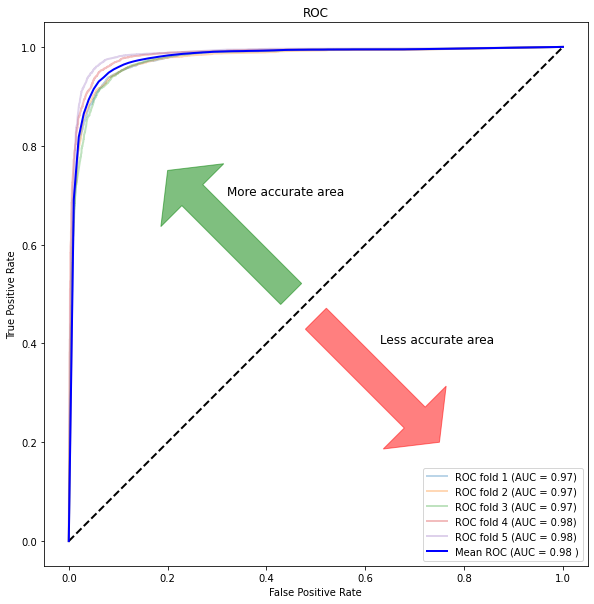

In [76]:
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in Kfold.split(X,Y):
    prediction = RandomForest_CV.fit(X.iloc[train],Y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

#### 3. Logistic Regression 

In [77]:
Regresi_CV = LogisticRegression(random_state=0).fit(Xtrain, Ytrain)
AkurasiRegresiCVScore = cross_val_score(Regresi_CV, X, Y, cv=Kfold, scoring='accuracy')
f1RegresiCVScore = cross_val_score(Regresi_CV, X, Y, cv=Kfold, scoring='f1')
presisi_reglog = cross_val_score(Regresi_CV, X, Y, cv=Kfold, scoring='precision')
AkurasiRegresiCV=AkurasiRegresiCVScore.mean()
f1RegresiCV=f1RegresiCVScore.mean()
presisilog = presisi_reglog.mean()
print('Akurasi :', AkurasiRegresiCV)
print('F1 :', f1RegresiCV)
print('Presisi :', presisilog)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Akurasi : 0.9373134995974362
F1 : 0.9328360976000798
Presisi : 0.927276353125919


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

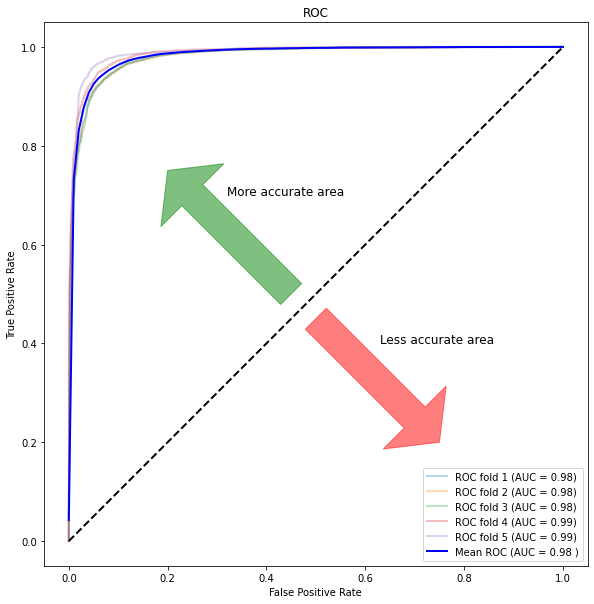

In [78]:
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in Kfold.split(X,Y):
    prediction = Regresi_CV.fit(X.iloc[train],Y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()